Я выбрал проект, посвящённый автоматической классификации бытовых отходов, поскольку проблема обращения с мусором напрямую влияет на состояние экосистем. Ошибки при сортировке отходов замедляют процессы переработки, увеличивают объёмы полигонов и приводят к попаданию пластика и других трудноразлагаемых материалов в почву и водоёмы.

Автоматизированные системы распознавания отходов по изображениям способны повысить точность сортировки, снизить нагрузку на окружающую среду и ускорить перерабатывающие процессы, что делает данное направление актуальным с точки зрения экологического мониторинга и устойчивого развития.

Применение методов искусственного интеллекта в задачах экологического мониторинга уже демонстрирует практическую иллюстрацию своей эффективности. Так, в России нейросетевые алгоритмы используются для анализа аэрофотоснимков береговых линий с целью выявления и классификации скоплений мусора. Подобные системы позволяют автоматически определять типы отходов, оценивать масштабы загрязнений и формировать координаты проблемных участков, что существенно упрощает планирование волонтёрских и экологических мероприятий.

Для решения поставленной задачи в рамках данного проекта была выбрана готовая предобученная модель классификации мусора — сверточная нейронная сеть (CNN), обученная на датасете TrashNet. Модель оптимизирована для распознавания шести распространённых категорий отходов и демонстрирует высокую точность классификации.

Использование предобученной модели позволяет быстро получить рабочий прототип и наглядно продемонстрировать возможности компьютерного зрения в задачах экологического мониторинга и автоматизированного управления отходами.

## Подготовка эксперимента

В этом разделе производится установка зависимостей, загрузка датасета TrashNet и
оценка предобученной модели для классификации отходов.

In [1]:
# Подготовка окружения и запуск эксперимента
!pip install -r requirements.txt
!python -m src.download_data
!python -m src.evaluate

Extracting to: C:\Users\Andrey\Desktop\МФТИ_Скиллфактори\лекции\1й семестр\8_Проектный практикум\eco-waste-monitoring-portfolio\data\trashnet
Done.
Tip: dataset images should be under:
  data/trashnet/dataset-resized/<class_name>/*.jpg



Downloading:   0%|          | 0.00/42.8M [00:00<?, ?B/s]
Downloading:   2%|2         | 1.05M/42.8M [00:00<00:10, 3.92MB/s]
Downloading:   5%|4         | 2.10M/42.8M [00:00<00:10, 3.90MB/s]
Downloading:  10%|9         | 4.19M/42.8M [00:00<00:05, 7.38MB/s]
Downloading:  15%|#4        | 6.29M/42.8M [00:00<00:04, 7.81MB/s]
Downloading:  17%|#7        | 7.34M/42.8M [00:01<00:04, 7.90MB/s]
Downloading:  22%|##2       | 9.44M/42.8M [00:01<00:03, 9.58MB/s]
Downloading:  27%|##6       | 11.5M/42.8M [00:01<00:03, 8.07MB/s]
Downloading:  32%|###1      | 13.6M/42.8M [00:01<00:03, 9.29MB/s]
Downloading:  37%|###6      | 15.7M/42.8M [00:01<00:02, 10.3MB/s]
Downloading:  42%|####1     | 17.8M/42.8M [00:02<00:02, 9.91MB/s]
Downloading:  47%|####6     | 19.9M/42.8M [00:02<00:02, 8.20MB/s]
Downloading:  51%|#####1    | 22.0M/42.8M [00:02<00:02, 9.93MB/s]
Downloading:  56%|#####6    | 24.1M/42.8M [00:02<00:01, 9.98MB/s]
Downloading:  61%|######1   | 26.2M/42.8M [00:02<00:01, 10.3MB/s]
Downloading:  66%|

Loading pretrained model: prithivMLmods/Trash-Net
Saved:
 - reports/metrics.json
 - reports/classification_report.txt
 - reports/confusion_matrix.png
Accuracy: 0.9588


2025-12-14 15:30:10.692776: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-14 15:30:19.845057: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu

Inference: 100%|##########| 2527/2527 [25:38<00:00,  1.64it/s]


## Необходимые библиотеки

В ходе эксперимента были использованы библиотеки Python для обработки изображений, загрузки предобученной модели и оценки качества классификации. Для работы с файловой системой и сохранения результатов применялись модули os и json. Загрузка и обработка изображений выполнялась с помощью библиотеки PIL. Предобученная модель классификации отходов была загружена из Hugging Face Hub с использованием transformers.pipeline. Оценка качества модели осуществлялась с помощью метрик библиотеки scikit-learn, а визуализация результатов — с использованием matplotlib.

In [2]:
import os
import json
import numpy as np
from PIL import Image

from transformers import pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

## Датасет и классы

В данном эксперименте используется датасет TrashNet, содержащий изображения
шести категорий бытовых отходов: cardboard, glass, metal, paper, plastic и
trash. Путь к локальной директории с датасетом задаётся переменной
`DATASET_PATH`, а список классов используется для сопоставления истинных и
предсказанных меток при оценке качества модели.

In [3]:
DATASET_PATH = "data/trashnet/dataset-resized"

CLASSES = [
    "cardboard",
    "glass",
    "metal",
    "paper",
    "plastic",
    "trash"
]

## Загрузка предобученной модели

В данном разделе загружается предобученная модель классификации отходов
`prithivMLmods/Trash-Net`, размещённая на платформе Hugging Face Hub.
Модель загружается с использованием интерфейса `transformers.pipeline`,
который обеспечивает удобный доступ к инференсу без необходимости
ручной настройки архитектуры нейронной сети.

In [4]:
model_id = "prithivMLmods/Trash-Net"

classifier = pipeline(
    "image-classification",
    model=model_id,
    device=0  # 0 = GPU, -1 = CPU
)

print("Model loaded:", model_id)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


Model loaded: prithivMLmods/Trash-Net


## Подготовка данных для оценки

На данном этапе производится сбор всех изображений из датасета TrashNet и
формирование соответствующих истинных меток классов. Для каждого изображения
сохраняется путь к файлу и его принадлежность к одному из шести классов отходов,
что позволяет в дальнейшем корректно оценить качество классификации модели.

In [5]:
image_paths = []
y_true = []

for cls in CLASSES:
    folder = os.path.join(DATASET_PATH, cls)
    for fname in os.listdir(folder):
        if fname.lower().endswith((".jpg", ".png", ".jpeg")):
            image_paths.append(os.path.join(folder, fname))
            y_true.append(cls)

print("Images:", len(image_paths))

Images: 2527


## Инференс изображений

На данном этапе выполняется прогон всех изображений из датасета через
предобученную модель классификации отходов. Для каждого изображения
получается наиболее вероятный класс, который затем приводится к формату,
соответствующему структуре датасета, и сохраняется для последующей оценки
качества классификации.

In [6]:
y_pred = []

for img_path in image_paths:
    img = Image.open(img_path).convert("RGB")
    result = classifier(img, top_k=1)[0]

    pred_label = result["label"].lower().replace("_", "").replace(" ", "")
    
    # нормализация названий классов
    mapped = "trash"
    for cls in CLASSES:
        if cls.replace("_", "") == pred_label:
            mapped = cls
            break

    y_pred.append(mapped)

## Общая точность классификации

In [7]:
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9588444796201029


В результате оценки предобученной модели на датасете TrashNet была достигнута
общая точность классификации **95.9%**, что свидетельствует о высокой способности
модели корректно распознавать основные категории бытовых отходов.

## Оценка качества по классам

In [8]:
print(classification_report(y_true, y_pred, labels=CLASSES))

              precision    recall  f1-score   support

   cardboard       0.99      0.97      0.98       403
       glass       0.95      0.96      0.96       501
       metal       0.95      0.96      0.96       410
       paper       0.94      0.99      0.96       594
     plastic       0.98      0.92      0.95       482
       trash       0.91      0.91      0.91       137

    accuracy                           0.96      2527
   macro avg       0.96      0.95      0.95      2527
weighted avg       0.96      0.96      0.96      2527



Результаты показывают высокое качество классификации для всех категорий отходов.
Наиболее высокие значения F1-score наблюдаются для классов *cardboard* (0.98) и
*paper* (0.96), что свидетельствует о хорошей различимости этих материалов на
изображениях.

Класс *trash* демонстрирует несколько более низкие значения метрик (F1-score = 0.91),
что объясняется высокой визуальной неоднородностью данного класса и наличием
объектов различной формы и текстуры.

Для классов *plastic* и *glass* также наблюдается небольшое снижение recall,
что указывает на наличие ошибок между визуально схожими материалами — типичную
проблему систем автоматической сортировки отходов.

## Матрица ошибок (Confusion Matrix)

Матрица ошибок демонстрирует распределение истинных и предсказанных классов
отходов. Элементы на главной диагонали соответствуют корректным предсказаниям,
тогда как значения вне диагонали отражают ошибки классификации.

Анализ матрицы ошибок показывает, что модель наиболее точно классифицирует
классы *cardboard* и *paper*. Основные ошибки возникают между визуально схожими
категориями, в частности между классами *plastic* и *glass*, что является
типичной проблемой для систем автоматической сортировки отходов.

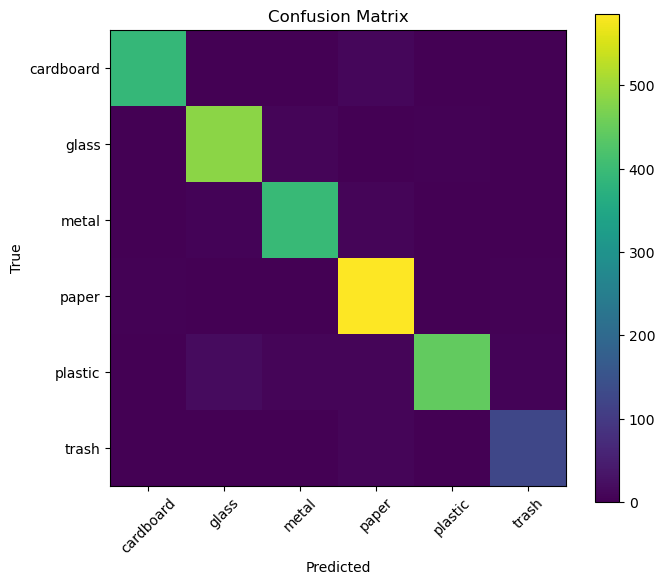

In [9]:
cm = confusion_matrix(y_true, y_pred, labels=CLASSES)

plt.figure(figsize=(7, 6))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()

plt.xticks(range(len(CLASSES)), CLASSES, rotation=45)
plt.yticks(range(len(CLASSES)), CLASSES)

plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()

## Сохранение результатов

In [10]:
os.makedirs("reports", exist_ok=True)

with open("reports/metrics_from_notebook.json", "w", encoding="utf-8") as f:
    json.dump({"accuracy": float(acc)}, f, indent=2)

plt.savefig("reports/confusion_matrix_from_notebook.png", dpi=200, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

По завершении эксперимента основные результаты были сохранены в директорию
`reports`. Значение общей точности классификации было записано в файл
`metrics_from_notebook.json`, а визуализация матрицы ошибок сохранена в формате
PNG для последующего использования в отчёте и публикации проекта.

In [11]:
# Проверка, что всё сохранилось
os.listdir("reports")

['classification_report.txt',
 'confusion_matrix.png',
 'confusion_matrix_from_notebook.png',
 'metrics.json',
 'metrics_from_notebook.json']

**ИТОГ:**  
В рамках работы была использована предобученная модель компьютерного зрения для задачи классификации отходов. Модель была протестирована на публичном датасете TrashNet, включающем 2527 изображений шести классов. В ходе эксперимента была достигнута точность классификации 96%. Анализ матрицы ошибок показал, что большинство ошибок возникает между визуально схожими материалами, в частности между классами plastic и glass, что соответствует практическим трудностям систем автоматической сортировки мусора.

## Предсказание для нового изображения

Для демонстрации практического применения модели реализована функция,
позволяющая выполнять классификацию произвольного изображения, не входящего
в тестовый набор данных. Функция загружает изображение, выполняет инференс
предобученной модели и выводит наиболее вероятный класс отходов с оценкой
доверия модели.

In [12]:
def predict_waste(image_path, classifier, classes):
    img = Image.open(image_path).convert("RGB")

    result = classifier(img, top_k=1)[0]

    pred_label = result["label"].lower().replace("_", "").replace(" ", "")
    score = result["score"]

    mapped = "trash"
    for cls in classes:
        if cls.replace("_", "") == pred_label:
            mapped = cls
            break

    print(
        f"На изображении скорее всего {mapped} "
        f"с вероятностью {score*100:.2f}%"
    )

    return mapped, score

In [ ]:
# Пример использования
predict_waste(
    "test_images/plastic/plastic1.jpg",
    classifier,
    CLASSES
)